# Regression

**Regression example using PyTorch framework.**

In [1]:
#Metadata
%load_ext watermark
%watermark -a "Vutsal Singhal" -p numpy,matplotlib,torch -u -n -t -z -m

Vutsal Singhal 
last updated: Mon Jan 15 2018 11:36:18 EST

numpy 1.13.3
matplotlib 2.1.0
torch 0.3.0.post4

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.13.0-26-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [2]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(1)    # reproducible

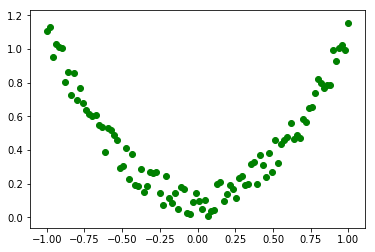

In [21]:
x    = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y    = x.pow(2) + 0.2*torch.rand(x.size())
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy(), y.data.numpy(), color='g')
plt.show()

## Defining network

In [16]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [17]:
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10)
  (predict): Linear(in_features=10, out_features=1)
)


In [18]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [19]:
plt.ion()

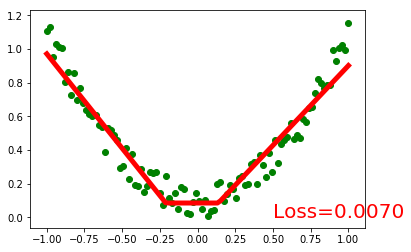

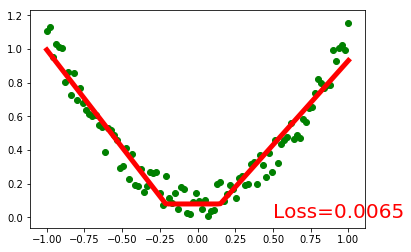

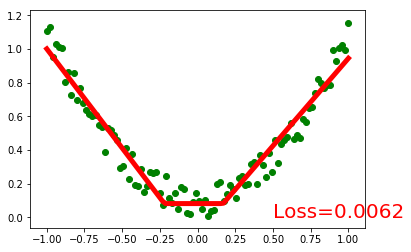

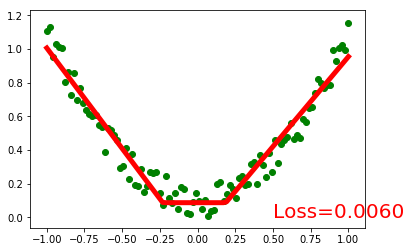

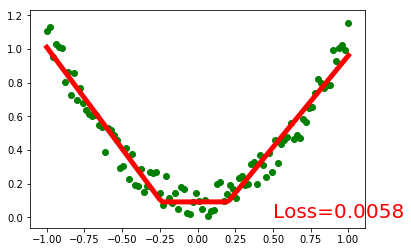

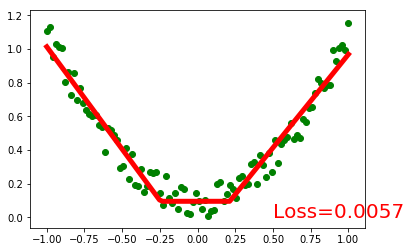

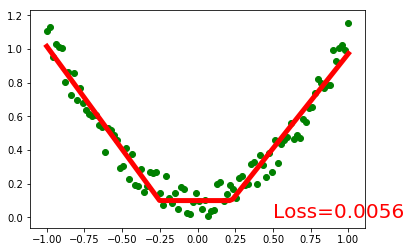

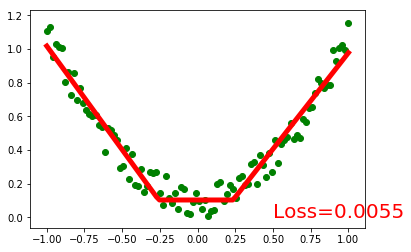

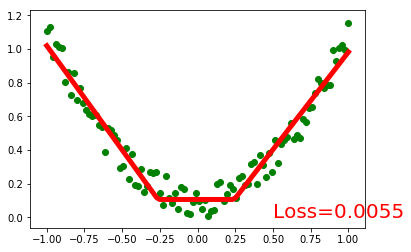

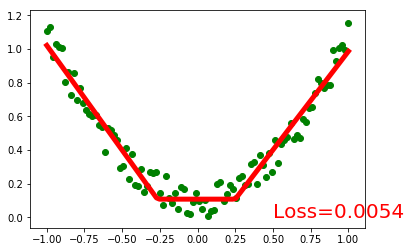

In [22]:
for t in range(100):
    prediction = net(x)
    loss = loss_func(prediction, y)

    optimizer.zero_grad()
    loss.backward()  # backpropagation, compute gradients
    optimizer.step() # apply gradients

    if t % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy(),color='g')
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.show()

plt.ioff()